# Naïve Bayes

We start by creating a data frame containing the game data. 

In [23]:
Outlook = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]
Temp = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"]
Humidity = ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"]
Windy = ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"]
Play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
import pandas as pd
play_df = pd.DataFrame({'Outlook':Outlook, 'Temp':Temp, 'Humidity':Humidity, 'Windy':Windy})

# add the Play column separately so that it appears last (otherwise Pandas will arrange the columns in alphabetical order)
play_df['Play'] = Play
play_df

,Outlook,Temp,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


## Categorical Naïve Bayes

### Building the model

We import the CategoricalNB class, which implements the categorical Naïve Bayes model.

In [24]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

We first need to create a dataframe with only the predictor attributes and encode those as required by the categorical NB class in sklearn (for each attribute, each category needs to be a number between 0 and n-1, where n is the number of categories i.e. possible values). Note that this encoding is meaningless with respect to magnitude (a 2 is not 'bigger than' a 1, they are all just labels).

In [25]:
play_x_df = play_df[play_df.columns[:-1]]

oen = OrdinalEncoder()
oen.fit(play_x_df)
play_x_encoded = oen.transform(play_x_df)
play_x_encoded

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

We create a categorical Naïve Bayes model object named `cnb`, of the class CategoricalNB, defined in the SciKit Learn package. The named argument alpha=0.001 is the additive smoothing parameter, used to deal with zero-probabilities in the model, otherwise caused by some attribute values not being present in the data set, in spite of being valid values. Alpha is chosen to be negligible by comparison to the positive counts in the data set.

In [29]:
cnb = CategoricalNB(alpha=0.001)
cnb.fit(play_x_encoded, play_df.Play)

CategoricalNB(alpha=0.001)

At this stage, `cnb` contains the fitted model and we can use it for prediction. We pass in the predictor attribute data used to train the model and get the model to predict the target values, to see how well it can deduce the target values from the inputs and its own 'learned' knowledge i.e. the model.

We place the values predicted by the model into a variable called `predicted`.

In [30]:
predicted = cnb.predict(play_x_encoded)
predicted

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype='<U3')

The Naïve Bayes model can also output probabilities, instead of categories. The probabilities are what it calculates anyway, using them to perform the classification by identifying the most probable class. Here we make a special call that gives us the probabilities i.e. the output of the step before classification.

In [31]:
predicted_probabilities = cnb.predict_proba(play_x_encoded)
predicted_probabilities

array([[7.95286286e-01, 2.04713714e-01],
       [9.20953171e-01, 7.90468291e-02],
       [6.47005565e-04, 9.99352994e-01],
       [4.63464081e-01, 5.36535919e-01],
       [6.72337801e-02, 9.32766220e-01],
       [1.77745131e-01, 8.22254869e-01],
       [8.10226464e-05, 9.99918977e-01],
       [6.60201523e-01, 3.39798477e-01],
       [1.39508071e-01, 8.60491929e-01],
       [9.75339976e-02, 9.02466002e-01],
       [4.21637738e-01, 5.78362262e-01],
       [9.70113737e-04, 9.99029886e-01],
       [8.09956725e-05, 9.99919004e-01],
       [7.21491987e-01, 2.78508013e-01]])

### Calculating the accuracy and confusion matrix

We can find the correctly predicted target attribute values by comparing the predictions with the actual values. The expression `play_df.Play == predicted` is used to select the target attribute values that were correctly predicted.

In [32]:
correctly_predicted = play_df.Play[play_df.Play == predicted]
correctly_predicted

0      No
1      No
2     Yes
3     Yes
4     Yes
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

The accuracy is the proportion of target attribute values that were correctly predicted. Now we calculate it.

In [33]:
accuracy = len(correctly_predicted)/len(predicted)
accuracy

0.9285714285714286

Now we have a look at a **baseline model** against which we can compare our model's prediction accuracy. A baseline model is one that is simple, straightforward and cost-effective. One such model is **majority prediction** which simply always predicts the mode of the target attribute value set (i.e. the most frequent value). In our target attribute value set, the value **Yes** appears 9 times and the value **No** appears 5 times. The majority prediction model would predict **Yes** for all instances and would end up correct in 9 out of 14 cases. Here we calculate the majority prediction accuracy.

In [34]:
majority_prediction_accuracy = 9/14
majority_prediction_accuracy

0.6428571428571429

Is the NB model's accuracy better than majority prediction accuracy? Yes. So we can say that in that particular way and for this particular set the NB model is better.

In [35]:
accuracy > majority_prediction_accuracy

True

Now we create a cross-table of predicted and actual values, called a **confusion matrix**. It provides more information than accuracy, consisting in this case of 4 numbers:

- true positive count (the number of cases that actually have the value **Yes** and were predicted as **Yes**: 9)
- false positive count (the number of cases that actually have the value **No** but were predicted as **Yes**: 1)
- false negative count (the number of cases that actually have the value **Yes** but were predicted as **No**: 0)
- true negative count (the number of cases that actually have the value **No** and were predicted as **No**: 4)

Note that **No** could just as well have been chosen as the *positive* value. *Positive* is a term used because models are often *detecting* something, for example whether a patient is likely to have a disease based on their symptoms.

In [36]:
confusion_matrix = pd.crosstab(play_df.Play, predicted, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted,No,Yes
Played,,
No,4,1
Yes,0,9


### Including cross-validation

In this part we repeat the exercise of building and testing a model but this time we use one portion of the data set (training data) to build the model and another portion (test data) to test it. 

We use a function called `test_train_split` to split our data into a group of instances for training and another group for testing. The function takes a dataframe (containing predictor attribute values) and a series (containing the target attribute values) and splits them, randomly choosing a certain number of instances to set aside for testing. The number is determined from the value passed in for the `test_size` parameter (in the example below it is 0.5, meaning half of all the instances).

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(play_x_encoded, play_df.Play, test_size=0.5)
print(X_train, "\n\n", X_test)
print("\n")
print(y_train, "\n\n", y_test)

[[2. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [2. 2. 0. 0.]
 [2. 2. 1. 1.]
 [2. 1. 0. 1.]] 

 [[2. 1. 0. 0.]
 [1. 2. 1. 0.]
 [0. 2. 0. 1.]
 [1. 2. 0. 0.]
 [0. 1. 1. 0.]
 [1. 2. 0. 1.]
 [1. 0. 1. 1.]]


8     Yes
6     Yes
2     Yes
4     Yes
7      No
10    Yes
1      No
Name: Play, dtype: object 

 0      No
9     Yes
11    Yes
3     Yes
12    Yes
13     No
5      No
Name: Play, dtype: object


Now repeat all the steps from above to build and test the model, but with the training and testing set:

In [38]:
cnbtt = CategoricalNB(alpha=0.001)
cnbtt.fit(X_train, y_train)

CategoricalNB(alpha=0.001)

In [39]:
predictedtt = cnbtt.predict(X_test)
predictedtt

array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [40]:
correctly_predictedtt = y_test[y_test == predictedtt]
correctly_predictedtt

0      No
9     Yes
11    Yes
3     Yes
12    Yes
Name: Play, dtype: object

In [41]:
accuracytt = len(correctly_predictedtt)/len(predictedtt)
accuracytt

0.7142857142857143

In [42]:
accuracytt > majority_prediction_accuracy

True

In [43]:
confusion_matrix = pd.crosstab(y_test, predictedtt, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted,No,Yes
Played,,
No,1,2
Yes,0,4


The accuracy of this model appears to be much worse, but that is because we are testing on data that has not been used for training.


## Gaussian Naïve Bayes 

This type of model is used when predicting a class from normally distributed numeric variables.

In our example the class is the iris Species and the predictor attributes are the sepal and petal dimensions (4 in all).

In [47]:
# get the data
iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv", index_col=0)
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


GaussianNB, a class found in the SciKit Learn package, implements the Gaussian Naïve Bayes model. We create an object of this class.

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

We create train and test subsets of the iris dataset. 

*iris.iloc[:,:-1]* extracts all the columns except the last, containing the numeric attributes (serving as predictor attributes in our model)

*iris['Species']* extracts the column, which will be the target attribute

In [49]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.iloc[:,:-1], iris['Species'], test_size=0.5)
iris_X_train.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
72,6.1,2.8,4.0,1.3
131,7.4,2.8,6.1,1.9
135,6.1,2.6,5.6,1.4
29,5.2,3.4,1.4,0.2
61,5.0,2.0,3.5,1.0
150,5.9,3.0,5.1,1.8
90,5.5,2.5,4.0,1.3
126,7.2,3.2,6.0,1.8
148,6.5,3.0,5.2,2.0
121,6.9,3.2,5.7,2.3


The following line trains the model.

In [50]:
gnb.fit(iris_X_train, iris_y_train)

GaussianNB()

Now we predict the target variable for the test data subset, passing in the predictor attribute values of the test subset.

In [51]:
iris_pred = gnb.predict(iris_X_test)
iris_pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'se

We calculate the accuracy in the same way as before.        

In [52]:
iris_accuracy = len(iris_y_test[iris_y_test == iris_pred])/len(iris_pred)
iris_accuracy

0.96

We create the confusion matrix, which in this case has three columns and three rows since the target attribute has three possible values (in other words, the instances of the data set can belong to one of three different classes).

In [53]:
pd.crosstab(iris_y_test, iris_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,setosa,versicolor,virginica
Actual,,,
setosa,28,0,0
versicolor,0,22,1
virginica,0,2,22


## Mixed Naïve Bayes 

Mixed Naïve Bayes (which predicts based on a combination of categorical and numeric variables) is not implemented in ScikitLearn at the moment. This may change (e.g. categorical NB has been added to it only in 2020), but in the meantime we can use a different package available from https://github.com/remykarem/mixed-naive-bayes. The package follows the naming patterns of Scikit Learn and is not difficult to use.

# Classification Tree

A classification tree can be used with categorical and numeric attributes. In the case of numeric attributes, the fitting function uses splitting criteria to split the numeric range into sub-ranges to act as categories.

## Classification tree example with categorical attributes

The Scikit Learn classification tree fitting function does not work on categorical attributes and we have to use the dummy (one-hot) encoded data. The encoding results in a variable for every possible categorical value becoming a variable, with values 0 and 1. The tree interprets these values as numeric, splitting the range [0,1] back into categories 0 and 1. 

The model fitting and evaluation steps are the same as in the Naïve Bayes example.

### Building the model and predicting

In [54]:
play_dummies_df = pd.concat([play_df.Humidity.str.get_dummies(), 
                             play_df.Outlook.str.get_dummies(),
                             play_df.Temp.str.get_dummies(),
                             play_df.Windy.str.get_dummies()], axis=1)
play_dummies_df


,High,Normal,Overcast,Rainy,Sunny,Cool,Hot,Mild,False,True
0,1,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,0,1,0,1,0
3,1,0,0,1,0,0,0,1,1,0
4,0,1,0,1,0,1,0,0,1,0
5,0,1,0,1,0,1,0,0,0,1
6,0,1,1,0,0,1,0,0,0,1
7,1,0,0,0,1,0,0,1,1,0
8,0,1,0,0,1,1,0,0,1,0
9,0,1,0,1,0,0,0,1,1,0


In [55]:
from sklearn import tree
classtree_ca = tree.DecisionTreeClassifier()
classtree_ca.fit(play_dummies_df, play_df.Play)

DecisionTreeClassifier()

In [56]:
predicted_ca = classtree_ca.predict(play_dummies_df)
predicted_ca

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

### Calculating the accuracy and confusion matrix

In [57]:
correctly_predicted = play_df.Play[play_df.Play == predicted]
correctly_predicted

0      No
1      No
2     Yes
3     Yes
4     Yes
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [58]:
accuracy = len(correctly_predicted)/len(predicted)
accuracy

0.9285714285714286

In [59]:
majority_prediction_accuracy = 9/14
majority_prediction_accuracy

0.6428571428571429

In [60]:
accuracy > majority_prediction_accuracy

True

In [61]:
confusion_matrix = pd.crosstab(play_df.Play, predicted, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted,No,Yes
Played,,
No,4,1
Yes,0,9


## Including cross-validation

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(play_dummies_df, play_df.Play, test_size=0.5)
print(X_train, "\n\n", X_test)

    High  Normal  Overcast  Rainy  Sunny  Cool  Hot  Mild  False  True
11     1       0         1      0      0     0    0     1      0     1
2      1       0         1      0      0     0    1     0      1     0
5      0       1         0      1      0     1    0     0      0     1
0      1       0         0      0      1     0    1     0      1     0
12     0       1         1      0      0     0    1     0      1     0
8      0       1         0      0      1     1    0     0      1     0
4      0       1         0      1      0     1    0     0      1     0 

     High  Normal  Overcast  Rainy  Sunny  Cool  Hot  Mild  False  True
7      1       0         0      0      1     0    0     1      1     0
9      0       1         0      1      0     0    0     1      1     0
3      1       0         0      1      0     0    0     1      1     0
10     0       1         0      0      1     0    0     1      0     1
6      0       1         1      0      0     1    0     0      0     1
1  

Now repeat all the steps from above, but with the training and testing set:

In [63]:
cttt_ca = tree.DecisionTreeClassifier()
cttt_ca.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
predictedtt = cttt_ca.predict(X_test)
predictedtt

array(['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [65]:
correctly_predictedtt = y_test[y_test == predictedtt]
correctly_predictedtt

7      No
9     Yes
6     Yes
1      No
13     No
Name: Play, dtype: object

In [66]:
accuracytt = len(correctly_predictedtt)/len(predictedtt)
accuracytt

0.7142857142857143

In [67]:
accuracytt > majority_prediction_accuracy

True

In [68]:
confusion_matrix = pd.crosstab(y_test, predictedtt, rownames=["Played"], colnames=["Predicted"])
confusion_matrix

Predicted,No,Yes
Played,,
No,3,0
Yes,2,2


## Classification tree example with numeric attributes

This example uses the iris dataset. We split it into subsets for training and testing. See the Scikit Learn documentation (https://scikit-learn.org/stable/modules/tree.html) for some nice classification tree visualisations. 

The model fitting and evaluation steps are the same as in the Naïve Bayes example. 

In [69]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.iloc[:,:-1], iris['Species'], test_size=0.5)
iris_X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
62,5.9,3.0,4.2,1.5
29,5.2,3.4,1.4,0.2
7,4.6,3.4,1.4,0.3
14,4.3,3.0,1.1,0.1
137,6.3,3.4,5.6,2.4


In [70]:
cttt_na = tree.DecisionTreeClassifier()
cttt_na.fit(iris_X_train, iris_y_train)

DecisionTreeClassifier()

In [71]:
iris_pred = cttt_na.predict(iris_X_test)
iris_pred

array(['virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'set

In [72]:
iris_accuracy = len(iris_y_test[iris_y_test == iris_pred])/len(iris_pred)
iris_accuracy

0.9333333333333333

In [73]:
pd.crosstab(iris_y_test, iris_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,setosa,versicolor,virginica
Actual,,,
setosa,27,0,0
versicolor,0,23,1
virginica,0,4,20


## Classification tree example with a mix of numeric and categorical variables

The categorical variables are dummy (one-hot) encoded but otherwise the tree is used in the same way as purely numeric or purely categorical predictor sets.

In [74]:
Outlook = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]
Temp = [27, 25, 28, 15, 9, 8, 7, 12, 9, 17, 15, 15, 22, 19]
Humidity = ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"]
Windy = ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"]
Play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
import pandas as pd
play_df = pd.DataFrame({'Outlook':Outlook, 'Temp':Temp, 'Humidity':Humidity, 'Windy':Windy})
# add the Play column separately so that it appears last (otherwise Pandas will arrange the columns in alphabetical order)
play_df['Play'] = Play
play_df

,Outlook,Temp,Humidity,Windy,Play
0,Sunny,27,High,False,No
1,Sunny,25,High,True,No
2,Overcast,28,High,False,Yes
3,Rainy,15,High,False,Yes
4,Rainy,9,Normal,False,Yes
5,Rainy,8,Normal,True,No
6,Overcast,7,Normal,True,Yes
7,Sunny,12,High,False,No
8,Sunny,9,Normal,False,Yes
9,Rainy,17,Normal,False,Yes


One-hot encoding of the categorical variables

In [75]:
play_dummy_num_df = pd.concat([play_df.Outlook.str.get_dummies(), 
                               play_df[['Temp']],
                               play_df.Humidity.str.get_dummies(),
                               play_df.Windy.str.get_dummies()], axis=1)
play_dummy_num_df

,Overcast,Rainy,Sunny,Temp,High,Normal,False,True
0,0,0,1,27,1,0,1,0
1,0,0,1,25,1,0,0,1
2,1,0,0,28,1,0,1,0
3,0,1,0,15,1,0,1,0
4,0,1,0,9,0,1,1,0
5,0,1,0,8,0,1,0,1
6,1,0,0,7,0,1,0,1
7,0,0,1,12,1,0,1,0
8,0,0,1,9,0,1,1,0
9,0,1,0,17,0,1,1,0


In [76]:
classtree_cna = tree.DecisionTreeClassifier()
classtree_cna.fit(play_dummy_num_df, play_df.Play)

DecisionTreeClassifier()

In [77]:
predicted_cna = classtree_cna.predict(play_dummy_num_df)
predicted_cna

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

As a last little exercise we will compare the result from the classification with categorical temperature values and this one.

In [78]:
import numpy as np
np.count_nonzero(predicted_ca != predicted_cna)

0

# Regression Tree

A regression tree can be used with categorical and numeric attributes. In the case of numeric attributes, the fitting function uses splitting criteria to split the numeric range into sub-ranges to act as categories.

In [80]:
auto_df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Auto.csv", index_col=0)
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


Prepare a data frame with only the predictor attributes.

In [81]:
auto_x_df = auto_df[auto_df.columns[:-3]]
auto_x_df

,mpg,cylinders,displacement,horsepower,weight,acceleration
1,18.0,8,307.0,130,3504,12.0
2,15.0,8,350.0,165,3693,11.5
3,18.0,8,318.0,150,3436,11.0
4,16.0,8,304.0,150,3433,12.0
5,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


Create, fit and predict with the regression tree.

In [82]:
regtree_na = tree.DecisionTreeRegressor()
regtree_na.fit(auto_x_df, auto_df['year'])
predicted_year = regtree_na.predict(auto_x_df)
predicted_year

array([70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. , 70. ,
       70. , 70. , 70. , 70. , 70. , 70. , 70. , 70.5, 70. , 70. , 70. ,
       70. , 70. , 70. , 70. , 70. , 70. , 70. , 70.5, 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. ,
       71. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 75

Find the rooted mean squared error.

In [83]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(auto_df['year'], predicted_year, squared=False)
rmse

0.03571428571428571

The RMSE value is very good, but it could indicate an overfitted tree. Let's first check how the model fares if we use a train/test split.

In [84]:
auto_X_trn, auto_X_tst, auto_y_trn, auto_y_tst = train_test_split(auto_x_df, auto_df['year'], test_size=0.5)
regtree_na_tt = tree.DecisionTreeRegressor()
regtree_na_tt.fit(auto_X_trn, auto_y_trn)
predicted_year_tt = regtree_na_tt.predict(auto_X_tst)
predicted_year_tt

array([82., 75., 72., 74., 80., 73., 78., 72., 81., 82., 70., 80., 75.,
       72., 71., 73., 72., 81., 82., 78., 81., 78., 78., 73., 82., 74.,
       74., 73., 79., 82., 82., 81., 82., 77., 78., 72., 81., 73., 72.,
       80., 78., 82., 81., 76., 70., 79., 77., 74., 75., 72., 78., 73.,
       71., 80., 75., 73., 79., 74., 70., 75., 81., 71., 78., 81., 72.,
       70., 72., 78., 71., 72., 81., 82., 71., 82., 80., 75., 73., 75.,
       78., 74., 77., 77., 73., 75., 81., 71., 72., 79., 82., 78., 70.,
       73., 76., 73., 78., 75., 72., 79., 70., 75., 77., 78., 76., 75.,
       74., 76., 70., 74., 81., 71., 72., 77., 72., 76., 72., 71., 81.,
       80., 82., 72., 73., 81., 80., 78., 71., 78., 82., 75., 80., 73.,
       74., 70., 81., 81., 71., 76., 78., 81., 81., 80., 74., 79., 75.,
       73., 70., 72., 73., 74., 78., 75., 76., 81., 81., 81., 80., 75.,
       80., 82., 77., 80., 81., 81., 79., 76., 81., 82., 76., 72., 72.,
       81., 71., 81., 77., 75., 81., 77., 75., 80., 78., 78., 72

In [85]:
rmse_tt = mean_squared_error(auto_y_tst, predicted_year_tt, squared=False)
rmse_tt

3.0730892520427076

In [86]:
predicted_year_tr = regtree_na_tt.predict(auto_X_trn)
rmse_tr = mean_squared_error(auto_y_trn, predicted_year_tr, squared=False)
rmse_tr

0.0

To **avoid overfitting**, we can try a shallower tree.

In [87]:
regtree_na_tt.feature_importances_

array([0.62451588, 0.00757357, 0.03641134, 0.12288535, 0.14112742,
       0.06748644])

In [94]:
regtree_na_sh = tree.DecisionTreeRegressor(max_depth=1)
regtree_na_sh.fit(auto_X_trn, auto_y_trn)
predicted_year_sh = regtree_na_sh.predict(auto_X_tst)
predicted_year_sh

array([80.24324324, 75.20125786, 75.20125786, 75.20125786, 80.24324324,
       75.20125786, 75.20125786, 75.20125786, 80.24324324, 75.20125786,
       75.20125786, 80.24324324, 75.20125786, 75.20125786, 75.20125786,
       75.20125786, 75.20125786, 80.24324324, 80.24324324, 75.20125786,
       80.24324324, 75.20125786, 75.20125786, 75.20125786, 80.24324324,
       75.20125786, 75.20125786, 75.20125786, 75.20125786, 80.24324324,
       80.24324324, 80.24324324, 75.20125786, 75.20125786, 75.20125786,
       75.20125786, 75.20125786, 75.20125786, 75.20125786, 80.24324324,
       75.20125786, 75.20125786, 75.20125786, 75.20125786, 75.20125786,
       75.20125786, 75.20125786, 75.20125786, 75.20125786, 75.20125786,
       75.20125786, 75.20125786, 75.20125786, 80.24324324, 75.20125786,
       75.20125786, 80.24324324, 75.20125786, 75.20125786, 75.20125786,
       75.20125786, 75.20125786, 75.20125786, 80.24324324, 75.20125786,
       75.20125786, 75.20125786, 75.20125786, 75.20125786, 75.20

Why are the predicted values not whole numbers?

In [95]:
rmse_sh = mean_squared_error(auto_y_tst, predicted_year_sh, squared=False)
rmse_sh

3.4187881513696734

To investigate further, we'll iterate through different depth values.

In [96]:
rmse_list = []
for i in range(1, 11):
    regtree_na_i = tree.DecisionTreeRegressor(max_depth=i)
    regtree_na_i.fit(auto_X_trn, auto_y_trn)
    predicted_year_i = regtree_na_i.predict(auto_X_tst)
    rmse_i = mean_squared_error(auto_y_tst, predicted_year_i, squared=False)
    rmse_list += [ rmse_i ]    

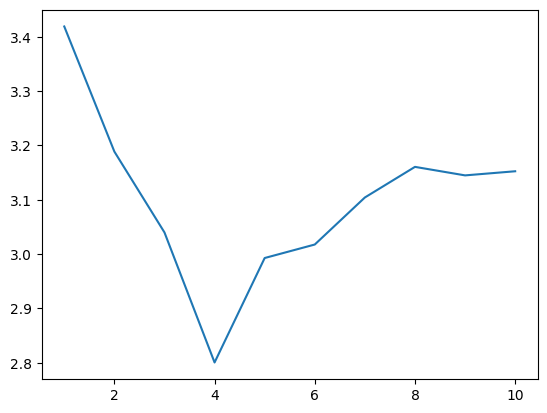

In [98]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), rmse_list)
plt.show()

# Linear Regression

The principle of fitting a regression model is the same as that for a classification model. The evaluation of the results is different as it uses the sum of squared errors (where the *error* is the difference between the predicted and real value) as a measure of model quality.

## Using one predictor variable

We split the iris data set into train and test sub-sets.

In [99]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
iris_X_train2, iris_X_test2, iris_y_train2, iris_y_test2 = train_test_split(iris.iloc[:,2:3], iris['Petal.Width'], test_size=0.5)

We fit the model. As with the other models, both the data frame with the predictor attribute training values and the target attribute training values are passed in.

In [100]:
regr.fit(iris_X_train2, iris_y_train2)

LinearRegression()

The prediction method is called in the usual way.

In [101]:
iris_pred2 = regr.predict(iris_X_test2)

The linear function coefficients can be read out of the model object after fitting and so can the measures of model quality. The mean square error is the sum of squared differences between the true and predicted values. The R squared score represents the proportion of the variability in the target values that can be 'explained' with the predictor attributes - it's a value between 0 and 1 and the greater it is, the better the model.

In [102]:
# The intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(iris_y_test2, iris_pred2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(iris_y_test2, iris_pred2))


Intercept: 
 -0.3835425126266456
Coefficients: 
 [0.41643997]
Mean squared error: 0.03
Variance score: 0.95


Let's also plot the data and the line fitted by linear regression.

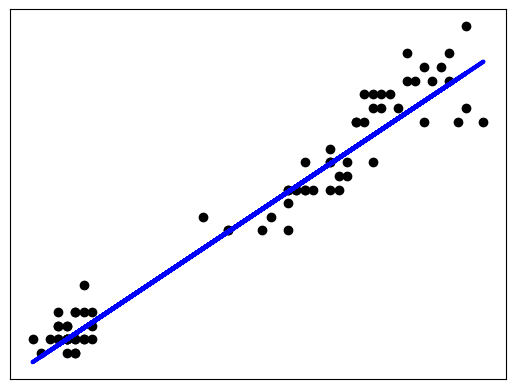

In [103]:
import matplotlib.pyplot as plt
plt.scatter(iris_X_test2, iris_y_test2,  color='black')
plt.plot(iris_X_test2, iris_pred2, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Using three predictor variables

We repeat the linear regression but using all the predictor attributes available (4 of them).

In [104]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
iris_X_train2, iris_X_test2, iris_y_train2, iris_y_test2 = train_test_split(iris.iloc[:,0:3], iris['Petal.Width'], test_size=0.5)

In [105]:
regr.fit(iris_X_train2, iris_y_train2)

LinearRegression()

In [106]:
iris_pred2 = regr.predict(iris_X_test2)

In [107]:
# The intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(iris_y_test2, iris_pred2))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(iris_y_test2, iris_pred2))


Intercept: 
 -0.346540624365135
Coefficients: 
 [-0.21694104  0.25943553  0.53693857]
Mean squared error: 0.03
R2 score: 0.94


If you run the single-predictor attribute regression and the multiple-predictor-attribute regression several times, you will find that the R-squared value (variance score) is consistently somewhat better in the latter case, because of the additional predictive power contained in the additional attributes. However, in many contexts, the very small increase in quality would not justify using the more complex model (with 4 rather than 1 predictor attribute).